# Exploratory Data Analysis of Books Management dataset

This dataset was created as a personal budget in an excel file to keep track of all the books that I've bought from 2014 to 2023. An Exploratory Data Analysis has been  conducted using Python.

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# setting the color palette for visualizations
sns.set_palette("rocket")

In [2]:
# loading the dataset
df=pd.read_csv(r'C:\Users\Dell\Downloads\Books_Management.csv')

In [3]:
# displaying the first 10 rows
df.head(10)

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
0,1,The cycle of Time,Simone Boger,English,Non Fiction,Paperback,NaN,₹20,Cash,2022,Partially read,Moderate,Female
1,2,The Danish Girl,David Ebershoff,English,Fiction,Paperback,W&N,₹28,Online,2020,Yes,Moderate,Male
2,3,A Room of One's Own,Virginia Woolf,English,Non Fiction,Paperback,Maple Classics,₹50,Cash,2023,Yes,Moderate,Female
3,4,Odyssey,Homer,Greek,Poetry,Paperback,Airmont Publishing Company Ltd,₹50,Cash,2023,No,None,Male
4,5,Light of the Bhagavata,A. C. B. Swami Prabhupada,English,Non Fiction,Paperback,The Bhakti Vedanta Book Trust,₹55,Online,2022,No,None,Male
5,6,Cradle Tales of Hinduism,Sister Nivedita,English,Fiction,Paperback,Advaita Ashrama,₹70,Online,2016,Yes,Moderate,Female
6,7,A Christmas Carol,Charles Dickens,English,Fiction,Paperback,Maple Classics,₹75,Online,2020,Yes,Moderate,Male
7,8,Pskov,NaN,English,Non Fiction,Hardcover,Raduga Publishers,₹80,Cash,2023,No,None,No information
8,9,Vladimir,NaN,English,Non Fiction,Hardcover,Raduga Publishers,₹80,Cash,2023,No,None,No information
9,10,Outstanding World's Wonder,Anita & Gagan Gupta,English,Non Fiction,Paperback,M G Books,₹95,Cash,2016,Yes,Moderate,Male and Female


In [6]:
# diplaying the last 5 rows
df.tail(5)

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
179,180,"Films and Dreams Tarkovsky, Bergman, Sokurov, ...",Thorsten Botz-Bornstein,English,Non Fiction,Ebook,Lexington Books,NaN,None,2022,No,None,Male
180,181,Andrei Tarkovsky Elements of Cinema,Robert Bird,English,Non Fiction,Ebook,Reaktion Books,NaN,None,2022,No,None,Male
181,182,Orlando,Virginia Woolf,English,Fiction,Paperback,Peacock Books,₹125,Online,2023,Yes,Excellent,Female
182,183,Critique of Pure Reason,Immanuel Kant,German,Non Fiction,Paperback,Penguin,₹531,Online,2023,No,None,Male
183,184,The Bell Jar,Sylvia Plath,English,Fiction,Paperback,Adarsh Books Pvt Ltd,₹225,Online,2023,Yes,Moderate,Female


In [7]:
# checking the shape of the dataset
df.shape

(184, 13)

The dataset has total 184 rows (i.e. Books) and 13 columns (different attributes of the books)

In [8]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    184 non-null    int64 
 1   Name                  184 non-null    object
 2   Writer                178 non-null    object
 3   Original_Language     184 non-null    object
 4   Genre                 184 non-null    object
 5   Binding               184 non-null    object
 6   Publication           152 non-null    object
 7   Price                 118 non-null    object
 8   Transaction_method    184 non-null    object
 9   Year                  184 non-null    int64 
 10  Read/Unread           184 non-null    object
 11  Rating                184 non-null    object
 12  Gender of the Writer  184 non-null    object
dtypes: int64(2), object(11)
memory usage: 18.8+ KB


The datatype for Price column is object, which needs to be changed into numerical type.

## Changing the 'Price' column's datatype from object to numeric

In [9]:
# removing '₹' and ',' from the price column
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '')
df.head()

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
0,1,The cycle of Time,Simone Boger,English,Non Fiction,Paperback,NaN,20,Cash,2022,Partially read,Moderate,Female
1,2,The Danish Girl,David Ebershoff,English,Fiction,Paperback,W&N,28,Online,2020,Yes,Moderate,Male
2,3,A Room of One's Own,Virginia Woolf,English,Non Fiction,Paperback,Maple Classics,50,Cash,2023,Yes,Moderate,Female
3,4,Odyssey,Homer,Greek,Poetry,Paperback,Airmont Publishing Company Ltd,50,Cash,2023,No,None,Male
4,5,Light of the Bhagavata,A. C. B. Swami Prabhupada,English,Non Fiction,Paperback,The Bhakti Vedanta Book Trust,55,Online,2022,No,None,Male


In [10]:
# changing the datatype to numeric
df['Price']=pd.to_numeric(df['Price'])
df['Price'].dtypes

dtype('float64')

In [11]:
# counting the number of values in each column
df.count()

Id                      184
Name                    184
Writer                  178
Original_Language       184
Genre                   184
Binding                 184
Publication             152
Price                   118
Transaction_method      184
Year                    184
Read/Unread             184
Rating                  184
Gender of the Writer    184
dtype: int64

It seems there are some null values in Writer, Publication and Price columns. Let's look into it.

## Looking for null values

In [12]:
# looking for null values
print(df.isnull().sum())

Id                       0
Name                     0
Writer                   6
Original_Language        0
Genre                    0
Binding                  0
Publication             32
Price                   66
Transaction_method       0
Year                     0
Read/Unread              0
Rating                   0
Gender of the Writer     0
dtype: int64


In [13]:
# showing null values in Writer column
df[df['Writer'].isna()]

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
7,8,Pskov,NaN,English,Non Fiction,Hardcover,Raduga Publishers,80.0,Cash,2023,No,None,No information
8,9,Vladimir,NaN,English,Non Fiction,Hardcover,Raduga Publishers,80.0,Cash,2023,No,None,No information
49,50,Bhagavad Gita,NaN,Sanskrit,Non Fiction,Hardcover,Prakash Deluxe Silk Hardbound,239.0,Online,2020,Yes,Excellent,No information
59,60,Holy Vedas,NaN,Sanskrit,Poetry,Hardcover,Grapevine India,290.0,Online,2020,Yes,Moderate,Male
110,111,Leonardo da Vinci: the complete works,NaN,English,Non Fiction,Hardcover,David and Charles,845.0,Online,2020,Yes,Excellent,No information
161,162,The Complete Greek Drama,NaN,Greek,Drama,Ebook,Random House,NaN,None,2022,Partially read,Moderate,Male


The Writer column has 6 null values and the books are mostly Non-Fictions that may be the works of several writers.

In [14]:
# showing null values in Publication column
df[df['Publication'].isna()]

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
0,1,The cycle of Time,Simone Boger,English,Non Fiction,Paperback,NaN,20.0,Cash,2022,Partially read,Moderate,Female
37,38,Rabindra galpagucchha,Rabindranath Tagore,Bengali,Fiction,Hardcover,NaN,190.0,Online,2021,Partially read,Moderate,Male
41,42,Catch-22,Joseph Heller,English,Fiction,Paperback,NaN,200.0,Online,2022,Yes,Excellent,Male
42,43,Pride & Prejudice,Jane Austen,English,Fiction,Paperback,NaN,200.0,Cash,2014,Yes,Excellent,Female
47,48,Sarat Rachana Samagra vol 2,Sarat Chandra Chattopadhyay,Bengali,Fiction,Hardcover,NaN,230.0,Online,2021,No,None,Male
54,55,Farewell to Arms,Ernest Hemingway,English,Fiction,Paperback,NaN,270.0,Online,2023,No,None,Male
58,59,Asura: Tale of the Vanquished,Anand Neelakantam,English,Fiction,Paperback,NaN,288.0,Online,2020,No,None,Male
97,98,The Art of Happiness,The Dalai Lama,English,Non Fiction,Paperback,NaN,459.0,Online,2020,Yes,Moderate,Male
112,113,Exotics and Retrospectives,Lafcadio Hearn,English,Non Fiction,Hardcover,NaN,NaN,None,2021,Yes,Excellent,Male
113,114,Ghostly Japan,Lafcadio Hearn,English,Non Fiction,Hardcover,NaN,NaN,None,2021,Yes,Excellent,Male


The publication column has 32 null values, most of them are ebooks. Since there are several ebook formats which doesn't necessarily need publishers to print them, these columns remain empty.

In [15]:
# showing null values in Price column
df[df['Price'].isna()]

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
112,113,Exotics and Retrospectives,Lafcadio Hearn,English,Non Fiction,Hardcover,NaN,NaN,None,2021,Yes,Excellent,Male
113,114,Ghostly Japan,Lafcadio Hearn,English,Non Fiction,Hardcover,NaN,NaN,None,2021,Yes,Excellent,Male
114,115,Glimpses of Unfamiliar Japan,Lafcadio Hearn,English,Non Fiction,Hardcover,NaN,NaN,None,2021,Yes,Excellent,Male
115,116,Kokoro Hints and Echoes of Japanese Inner Life,Lafcadio Hearn,English,Non Fiction,Hardcover,NaN,NaN,None,2021,Yes,Excellent,Male
116,117,Kwaidan,Lafcadio Hearn,English,Non Fiction,Hardcover,NaN,NaN,None,2021,Yes,Excellent,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,"Transcendental Style in Film Ozu, Bresson, Dreyer",Paul Schrader,English,Fiction,Ebook,University of California Press,NaN,None,2022,No,None,Male
177,178,Ozu his life and films,Donald Richie,English,Non Fiction,Ebook,University of California Press,NaN,None,2022,No,None,Male
178,179,Sculpting In Time,Andrei Tarkovsky,Russian,Non Fiction,Ebook,NaN,NaN,None,2022,Partially read,None,Male
179,180,"Films and Dreams Tarkovsky, Bergman, Sokurov, ...",Thorsten Botz-Bornstein,English,Non Fiction,Ebook,Lexington Books,NaN,None,2022,No,None,Male


The Price columns has 66 null values, mostly are of ebook format. Since ebooks are free, it accounts for their null values. I'll leave the dataset as it is and not drop the null values since it is a small dataset. 

## Number of books in each genre

In [16]:
df['Genre'].value_counts()

Non Fiction    81
Fiction        74
Poetry         13
Drama          13
Prose           3
Name: Genre, dtype: int64

Most of the books in my collection are Non-Fictions, followed by Fictions.

## Number of books by binding

In [17]:
df['Binding'].value_counts()

Paperback    93
Ebook        58
Hardcover    33
Name: Binding, dtype: int64

Paperbacks consists about 50% of the entire collection. Ebook is the second most popular format.

## Ratings of the books

In [18]:
df['Rating'].value_counts()

Excellent    69
Moderate     61
None         51
Bad           3
Name: Rating, dtype: int64

Majority of the books have either excellent or moderate rating, meaning I enjoyed reading these books and consequently are my favorites too.

## Original languages

In [19]:
df['Original_Language'].value_counts()

English     124
Russian      20
Japanese     10
French        8
German        6
Greek         5
Bengali       5
Sanskrit      2
Others        2
Spanish       1
Persian       1
Name: Original_Language, dtype: int64

## Gender of the writer

In [20]:
df['Gender of the Writer'].value_counts()

Male               157
Female              20
No information       4
Male and Female      3
Name: Gender of the Writer, dtype: int64

In [23]:
# list of books by female writers
female_writers=df[df['Gender of the Writer']=='Female']
female_writers

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
0,1,The cycle of Time,Simone Boger,English,Non Fiction,Paperback,NaN,20.0,Cash,2022,Partially read,Moderate,Female
2,3,A Room of One's Own,Virginia Woolf,English,Non Fiction,Paperback,Maple Classics,50.0,Cash,2023,Yes,Moderate,Female
5,6,Cradle Tales of Hinduism,Sister Nivedita,English,Fiction,Paperback,Advaita Ashrama,70.0,Online,2016,Yes,Moderate,Female
30,31,Little Women,Louisa May Alcott,English,Fiction,Paperback,Vintage classics,162.0,Online,2021,Yes,Excellent,Female
42,43,Pride & Prejudice,Jane Austen,English,Fiction,Paperback,NaN,200.0,Cash,2014,Yes,Excellent,Female
46,47,Wuthering Heights,Emily Bronte,English,Fiction,Paperback,Scholastic,225.0,None,2021,Yes,Bad,Female
48,49,Jane Eyre,Charlotte Bronte,English,Fiction,Paperback,Penguin,234.0,Online,2020,Yes,Moderate,Female
60,61,The God of Small Things,Arundhati Roy,English,Fiction,Paperback,Penguin,295.0,None,2021,No,None,Female
86,87,"Banaras, city of light",Diana L. Eck,English,Non Fiction,Paperback,Penguin,395.0,Online,2019,Yes,Moderate,Female
93,94,"Egypt: Gods, Myths and Religion",Lucia Gahlin,English,Non Fiction,Paperback,Southwater,428.0,Online,2020,Yes,Excellent,Female


## Number of Unread books

In [24]:
df['Read/Unread'].value_counts()

Yes               119
No                 44
Partially read     21
Name: Read/Unread, dtype: int64

Most of the books in my collection are already read. 44 of them are unread and 21 partially read.

In [25]:
# list of unread books
unread_books=df[df['Read/Unread']=='No']
unread_books

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
3,4,Odyssey,Homer,Greek,Poetry,Paperback,Airmont Publishing Company Ltd,50.0,Cash,2023,No,None,Male
4,5,Light of the Bhagavata,A. C. B. Swami Prabhupada,English,Non Fiction,Paperback,The Bhakti Vedanta Book Trust,55.0,Online,2022,No,None,Male
7,8,Pskov,NaN,English,Non Fiction,Hardcover,Raduga Publishers,80.0,Cash,2023,No,None,No information
8,9,Vladimir,NaN,English,Non Fiction,Hardcover,Raduga Publishers,80.0,Cash,2023,No,None,No information
12,13,Fairy Tales,The Brothers Grimm,English,Fiction,Hardcover,Children's Classics,100.0,Online,2022,No,Moderate,Male
25,26,Browning,Robert Browning,English,Poetry,Paperback,Penguin,150.0,Cash,2023,No,None,Male
26,27,Poems of Robert Frost,Robert Frost,English,Poetry,Paperback,Washington Square Press Ltd,150.0,Cash,2023,No,None,Male
27,28,Shelley,Percy Bysshe Shelley,English,Poetry,Paperback,Penguin,150.0,Cash,2023,No,None,Male
40,41,The origin of Species,Charles Darwin,English,Non Fiction,Paperback,Fingerprint classics,199.0,Online,2020,No,None,Male
47,48,Sarat Rachana Samagra vol 2,Sarat Chandra Chattopadhyay,Bengali,Fiction,Hardcover,NaN,230.0,Online,2021,No,None,Male


In [26]:
# list of partially read books
partially_read_books=df[df['Read/Unread']=='Partially read']
partially_read_books

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
0,1,The cycle of Time,Simone Boger,English,Non Fiction,Paperback,NaN,20.0,Cash,2022,Partially read,Moderate,Female
15,16,The Iliad,Homer,Greek,Poetry,Paperback,Wordsworth Classics,100.0,Cash,2023,Partially read,Moderate,Male
34,35,Selected short stories of Anton Chekhov,Anton Chekhov,Russian,Fiction,Paperback,Little Scholarz pvt Ltd,175.0,Cash,2022,Partially read,Moderate,Male
37,38,Rabindra galpagucchha,Rabindranath Tagore,Bengali,Fiction,Hardcover,NaN,190.0,Online,2021,Partially read,Moderate,Male
50,51,Great works of Jules Verne,Jules Verne,French,Fiction,Paperback,Projapoti,240.0,Online,2022,Partially read,Excellent,Male
98,99,Man Of Mathematics,E. T. Bell,English,Non Fiction,Paperback,Touchstone,469.0,Online,2022,Partially read,Moderate,Male
101,102,Kafka on the Shore,Haruki Murakami,Japanese,Fiction,Paperback,Vintage Books London,499.0,Online,2022,Partially read,None,Male
104,105,William Shakespeare complete works,William Shakespeare,English,Drama,Paperback,Arden,630.0,Online,2022,Partially read,Excellent,Male
108,109,The Count of Monte Cristo,Alexander Dumas,French,Fiction,Hardcover,Penguin,797.0,Online,2022,Partially read,Excellent,Male
123,124,A Study of Spinoza,James Martineau,English,Non Fiction,Ebook,Macmillan and Co.,NaN,None,2022,Partially read,None,Male


## Transaction Method

In [27]:
df['Transaction_method'].value_counts()

Online    88
None      72
Cash      24
Name: Transaction_method, dtype: int64

Most of the transactions has been done online. Some shows None which means either they're free(eg ebooks) or they were gifted to me.

## Top 10 Writers

In [28]:
top_10_writers=(df['Writer'].value_counts()).iloc[:10]
top_10_writers

Fyodor Dostoevsky     10
Lafcadio Hearn         9
J. R. R. Tolkien       4
David Michie           4
Anton Chekhov          4
Tennessee Williams     4
Murasaki Shikibu       3
Dan Brown              3
O. Henry               2
The Dalai Lama         2
Name: Writer, dtype: int64

Text(0.5, 1.0, 'Top 10 Writers')

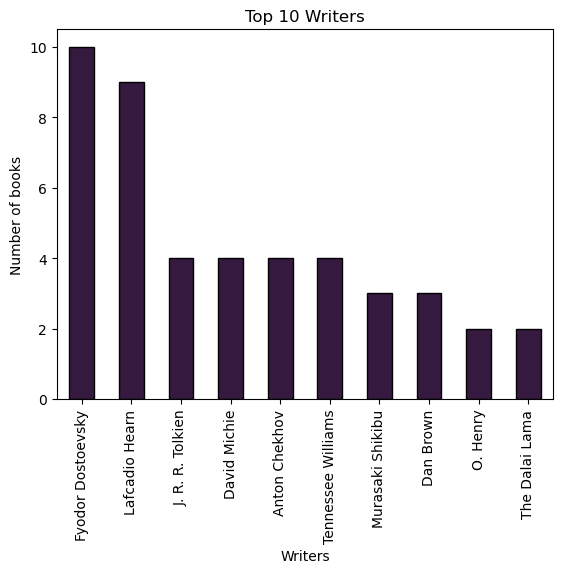

In [29]:
# Bar graph showing Top 10 writers
top_10_writers.plot(kind='bar', edgecolor='black')
plt.xlabel('Writers')
plt.ylabel('Number of books')
plt.title('Top 10 Writers')

## Top 10 Publishers

In [33]:
top_10_publishers=(df['Publication'].value_counts()).iloc[:10]
top_10_publishers

Penguin                           11
Harper Collins                     7
Maple Classics                     7
Penguin                            6
Hay House India                    4
RHUK                               4
University of California Press     4
Bloomsbury publication             3
Anand Publishers                   3
Tuttle Publishing                  3
Name: Publication, dtype: int64

Text(0.5, 1.0, 'Top 10 Publishers')

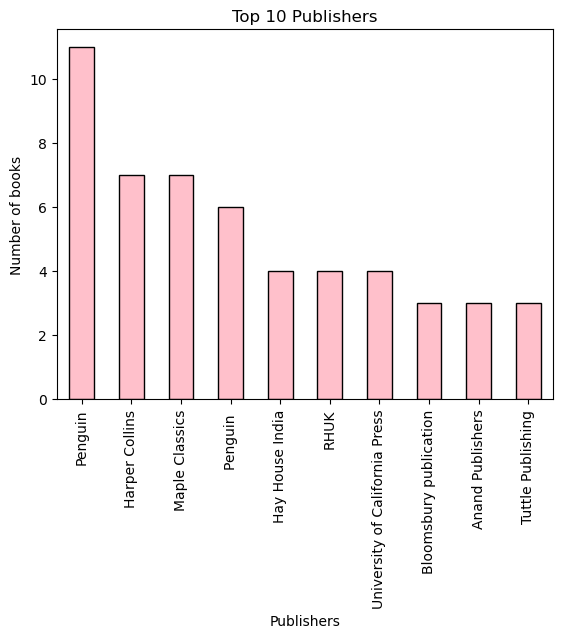

In [34]:
# Bar Graph showing top 10 publishers
top_10_publishers.plot(kind='bar', edgecolor='black', color=['pink'])
plt.xlabel('Publishers')
plt.ylabel('Number of books')
plt.title('Top 10 Publishers')

## Number of books bought from 2014-2023

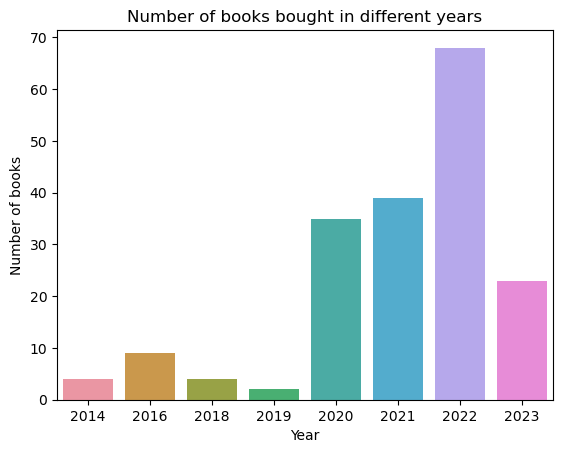

In [32]:
g=sns.countplot(x='Year',data=df)
g.set_title('Number of books bought in different years')
g.set_xlabel('Year')
g.set_ylabel('Number of books')
plt.show()

In [31]:
# Number of books bought in different years
df['Year'].value_counts()

2022    68
2021    39
2020    35
2023    23
2016     9
2014     4
2018     4
2019     2
Name: Year, dtype: int64

## Price of books by years

In [35]:
df.groupby('Year').sum()['Price']

C:\Users\Dell\AppData\Local\Temp\ipykernel_7112\2458835031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').sum()['Price']


Year
2014      555.0
2016     1755.0
2018      994.0
2019      545.0
2020    10970.0
2021    10423.0
2022     5815.0
2023     3637.0
Name: Price, dtype: float64

## Total Price of books bought from 2014-2016

In [36]:
total_price=df['Price'].sum()
print('Total price of the books is ₹', total_price)

Total price of the books is ₹ 34694.0


## Mean price of books by genre

In [37]:
df.groupby('Genre').mean()['Price']

C:\Users\Dell\AppData\Local\Temp\ipykernel_7112\2927486374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Genre').mean()['Price']


Genre
Drama          266.000000
Fiction        293.984615
Non Fiction    318.894737
Poetry         199.375000
Prose          276.000000
Name: Price, dtype: float64

## Histogram of Price

Text(0.5, 1.0, 'Histogram for Price')

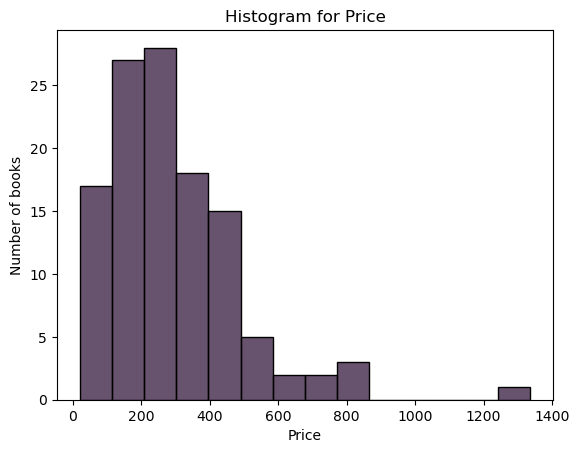

In [42]:
sns.histplot(data=df, x="Price")
plt.xlabel('Price')
plt.ylabel('Number of books')
plt.title('Histogram for Price')

This is a right skewed histogram showing the distribution of books across the price range. The price of most of the books falls between ₹300-₹400. The number of books drops steadily as price increases

## Most Expensive book

In [44]:
expensive_book_price=df['Price'].max()
print('The most expensive book costs ',expensive_book_price)

The most expensive book costs  1337.0


In [45]:
expensive_book=df[df['Price']==1337]
expensive_book['Name']

111    Complete Chronicle of Narnia
Name: Name, dtype: object

## Cheapest book

In [46]:
cheapest_book_price=df['Price'].min()
print('The cheapest book costs ', cheapest_book_price)

The cheapest book costs  20.0


In [47]:
cheapest_book=df[df['Price']==20]
cheapest_book['Name']

0    The cycle of Time
Name: Name, dtype: object

## Descriptive statistics

In [48]:
df.describe(include='all')

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
count,184.000000,184,178,184,184,184,152,118.000000,184,184.000000,184,184,184
unique,NaN,183,130,11,5,3,98,NaN,3,NaN,3,4,4
top,NaN,The Picture of Dorian Gray,Fyodor Dostoevsky,English,Non Fiction,Paperback,Penguin,NaN,Online,NaN,Yes,Excellent,Male
freq,NaN,2,10,124,81,93,11,NaN,88,NaN,119,69,157
mean,92.614130,NaN,NaN,NaN,NaN,NaN,NaN,294.016949,NaN,2020.945652,NaN,NaN,NaN
std,53.281785,NaN,NaN,NaN,NaN,NaN,NaN,194.345449,NaN,1.898312,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,2014.000000,NaN,NaN,NaN
25%,46.750000,NaN,NaN,NaN,NaN,NaN,NaN,151.500000,NaN,2020.000000,NaN,NaN,NaN
50%,93.500000,NaN,NaN,NaN,NaN,NaN,NaN,280.000000,NaN,2021.000000,NaN,NaN,NaN
75%,138.250000,NaN,NaN,NaN,NaN,NaN,NaN,382.750000,NaN,2022.000000,NaN,NaN,NaN


From the Price column we can see, the mean price of this collection is ₹294. 50% of the entire collection of the books costs ₹280 or less.

## Boxplot for Price

Text(0.5, 1.0, 'Prices of books by genre')

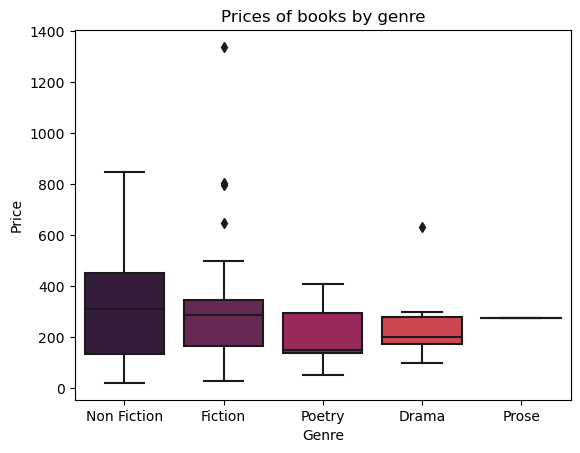

In [49]:
# plotting a boxplot for descriptive statistics of 'Price' column

g=sns.boxplot(data=df, x='Genre',y='Price')
g.set_title("Prices of books by genre")

There are some books in Fiction and Drama genre that costs more than the average price of each genre. These are outliers.

In [50]:
# Fictional books that cost more than ₹600
fiction_books=df[df['Genre']=='Fiction']
fiction_books[fiction_books['Price']>600]

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
105,106,Les Miserables,Victor Hugo,French,Fiction,Paperback,Vintage Classics,648.0,Online,2021,Yes,Excellent,Male
108,109,The Count of Monte Cristo,Alexander Dumas,French,Fiction,Hardcover,Penguin,797.0,Online,2022,Partially read,Excellent,Male
109,110,The Lord of the rings,J. R. R. Tolkien,English,Fiction,Paperback,Harper Collins,805.0,Online,2021,Yes,Excellent,Male
111,112,Complete Chronicle of Narnia,C. S. Lewis,English,Fiction,Hardcover,Harper Collins,1337.0,Online,2022,Yes,Excellent,Male


In [51]:
# drama that costs more than ₹600
drama= df[df['Genre']=='Drama']
drama[drama['Price']>=600]

,Id,Name,Writer,Original_Language,Genre,Binding,Publication,Price,Transaction_method,Year,Read/Unread,Rating,Gender of the Writer
104,105,William Shakespeare complete works,William Shakespeare,English,Drama,Paperback,Arden,630.0,Online,2022,Partially read,Excellent,Male
